# 日経平均株価 週足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'N225'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14 00:00:00+09:00,25338.640625,26862.429688,25219.130859,26827.429688,425900000,0.0,0.0
2022-03-21 00:00:00+09:00,27091.320312,28338.810547,27076.330078,28149.839844,325200000,0.0,0.0
2022-03-28 00:00:00+09:00,28084.080078,28281.449219,27399.480469,27665.980469,371800000,0.0,0.0
2022-04-04 00:00:00+09:00,27685.650391,27965.939453,26764.359375,26985.800781,332500000,0.0,0.0
2022-04-11 00:00:00+09:00,26877.599609,27203.769531,26304.080078,27093.189453,333700000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00+09:00,38736.371094,39581.468750,38606.320312,39149.429688,573400000,0.0,0.0
2025-02-17 00:00:00+09:00,39094.089844,39508.550781,38456.531250,38776.941406,606900000,0.0,0.0
2025-02-24 00:00:00+09:00,38359.671875,38485.949219,36840.121094,37155.500000,566900000,0.0,0.0


In [3]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16 00:00:00+09:00,17586.080078,17785.759766,16358.190430,16552.830078,733000000,0.0,0.0
2020-03-23 00:00:00+09:00,16570.570312,19564.380859,16480.949219,19389.429688,742300000,0.0,0.0
2020-03-30 00:00:00+09:00,18884.070312,19336.189453,17646.500000,17820.189453,552300000,0.0,0.0
2020-04-06 00:00:00+09:00,17857.990234,19500.070312,17802.619141,19498.500000,489600000,0.0,0.0
2020-04-13 00:00:00+09:00,19312.039062,19922.070312,19014.320312,19897.259766,410800000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00+09:00,38736.371094,39581.468750,38606.320312,39149.429688,573400000,0.0,0.0
2025-02-17 00:00:00+09:00,39094.089844,39508.550781,38456.531250,38776.941406,606900000,0.0,0.0
2025-02-24 00:00:00+09:00,38359.671875,38485.949219,36840.121094,37155.500000,566900000,0.0,0.0


## Moving Median

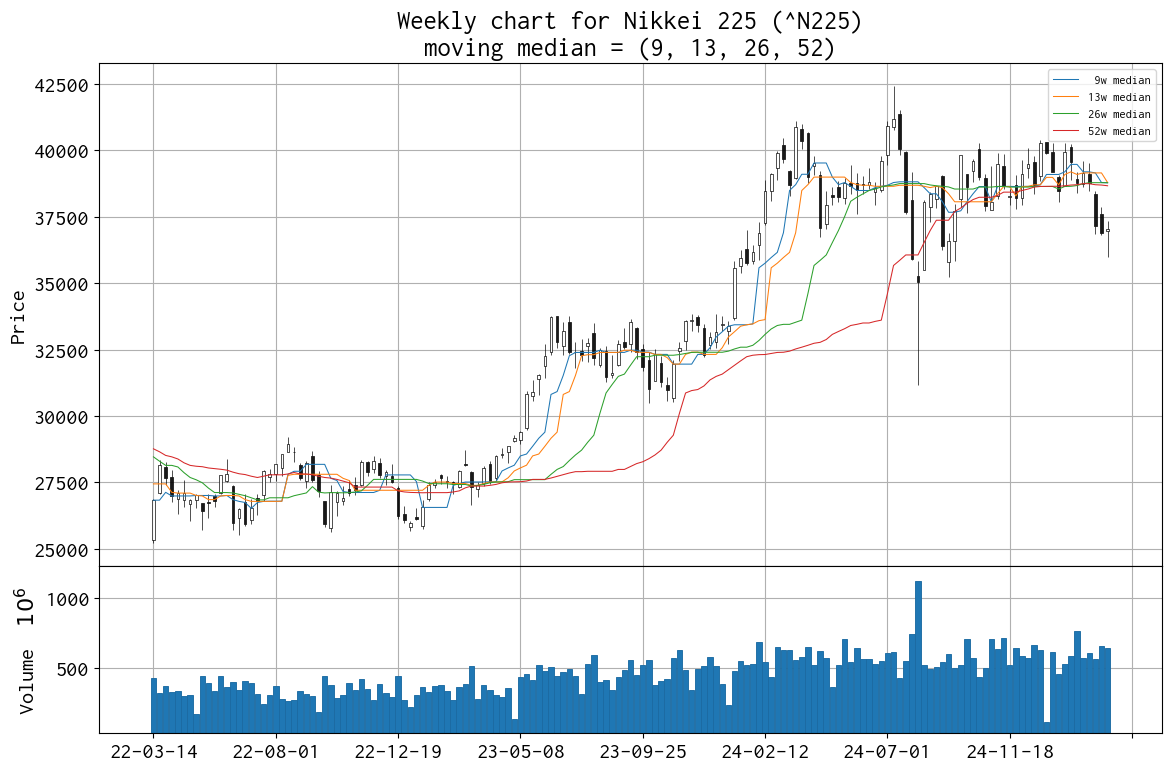

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w median', ax=ax[0]),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w median', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w median', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (9, 13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-03 00:00:00+09:00,37617.500000,37874.378906,36813.621094,36887.171875,659400000,0.0,0.0
2025-03-10 00:00:00+09:00,36972.589844,37326.269531,35987.128906,37053.101562,646200000,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00+09:00    36887.171875
2025-03-10 00:00:00+09:00    37053.101562
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00+09:00           NaN
2025-03-10 00:00:00+09:00    165.929688
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-10 00:00:00+09:00    80.511719
dtype: float64

In [9]:
df['Close'].rolling(13).median().tail()

Date
2025-02-10 00:00:00+09:00    39149.429688
2025-02-17 00:00:00+09:00    39149.429688
2025-02-24 00:00:00+09:00    39149.429688
2025-03-03 00:00:00+09:00    39149.429688
2025-03-10 00:00:00+09:00    38787.019531
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(26).median().tail()

Date
2025-02-10 00:00:00+09:00    38744.458984
2025-02-17 00:00:00+09:00    38781.980469
2025-02-24 00:00:00+09:00    38781.980469
2025-03-03 00:00:00+09:00    38781.980469
2025-03-10 00:00:00+09:00    38781.980469
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(52).median().tail()

Date
2025-02-10 00:00:00+09:00    38747.330078
2025-02-17 00:00:00+09:00    38742.291016
2025-02-24 00:00:00+09:00    38704.769531
2025-03-03 00:00:00+09:00    38692.914062
2025-03-10 00:00:00+09:00    38665.839844
Name: Close, dtype: float64

## Robust Bollinger's bands

In [12]:
period = 26
calc_robust_bollinger(df0, period)
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-03-16 00:00:00+09:00,17586.080078,17785.759766,16358.190430,16552.830078,733000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-23 00:00:00+09:00,16570.570312,19564.380859,16480.949219,19389.429688,742300000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00+09:00,18884.070312,19336.189453,17646.500000,17820.189453,552300000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-06 00:00:00+09:00,17857.990234,19500.070312,17802.619141,19498.500000,489600000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-13 00:00:00+09:00,19312.039062,19922.070312,19014.320312,19897.259766,410800000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 00:00:00+09:00,38736.371094,39581.468750,38606.320312,39149.429688,573400000,0.0,0.0,38674.824219,38226.986328,39492.888672,36328.132812,41391.742188
2025-02-17 00:00:00+09:00,39094.089844,39508.550781,38456.531250,38776.941406,606900000,0.0,0.0,38744.458984,38303.956055,39492.888672,36520.557129,41276.287598
2025-02-24 00:00:00+09:00,38359.671875,38485.949219,36840.121094,37155.500000,566900000,0.0,0.0,38781.980469,38325.753906,39492.888672,36575.051758,41243.590820


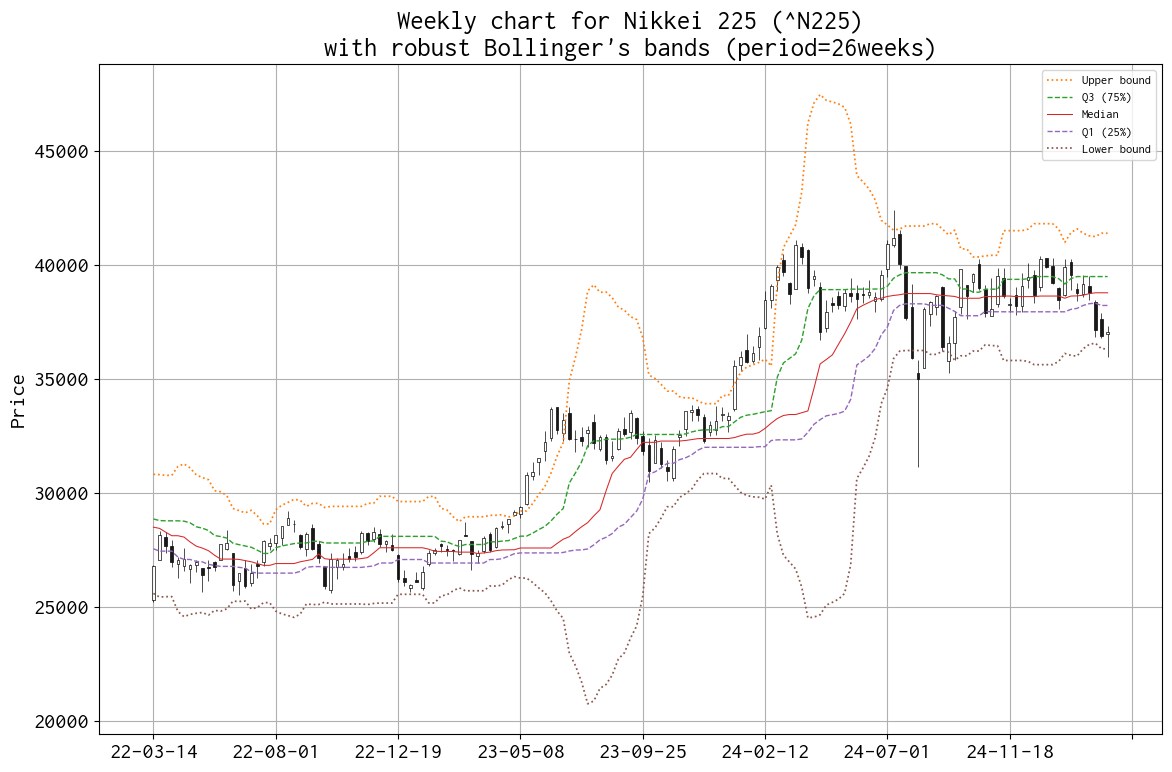

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

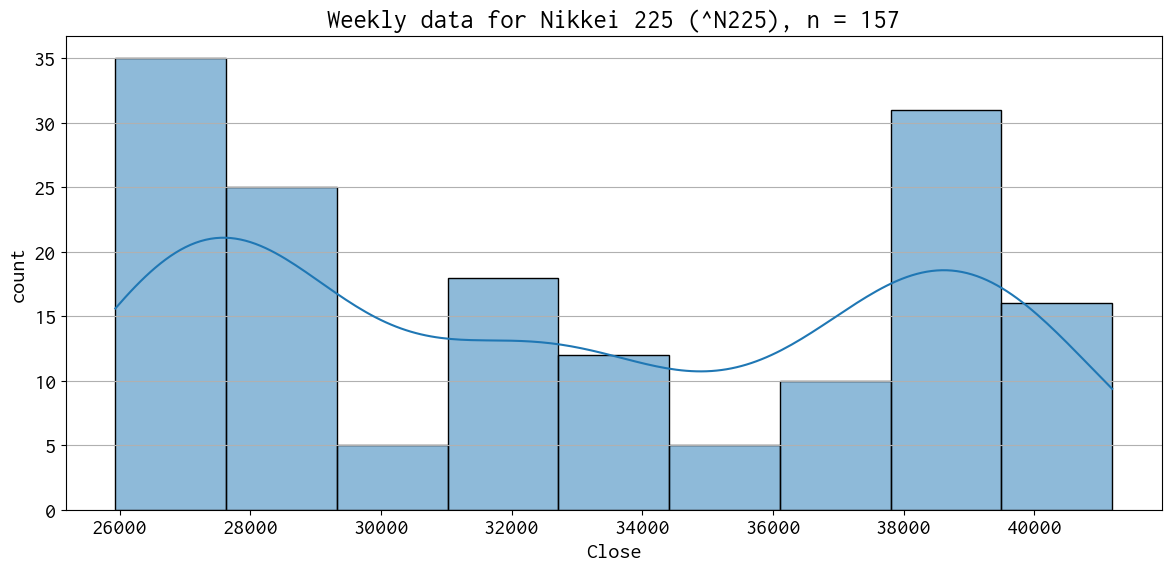

In [14]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_weekly_histogram_%s.png' % code)
plt.show()